# <h2>Sales Prediction</h2> 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv(r"C:\Users\Hp\Downloads\Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [29]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# <h3>Visualization</h3>

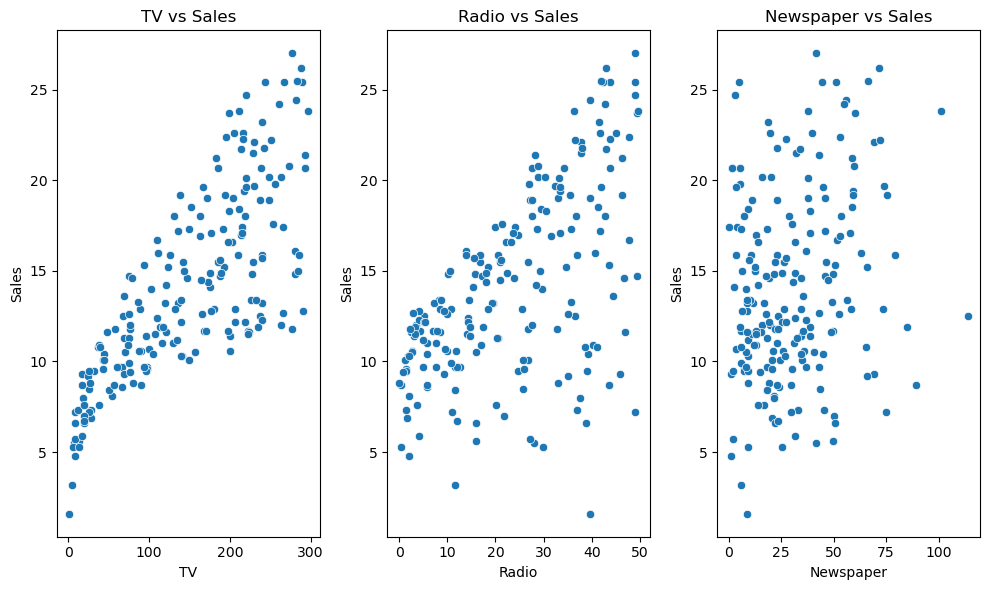

In [35]:
import seaborn as sns
plt.figure(figsize=(10, 6))

# Plot for TV vs Sales
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=data)
plt.title('TV vs Sales')

# Plot for Radio vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=data)
plt.title('Radio vs Sales')

# Plot for Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=data)
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


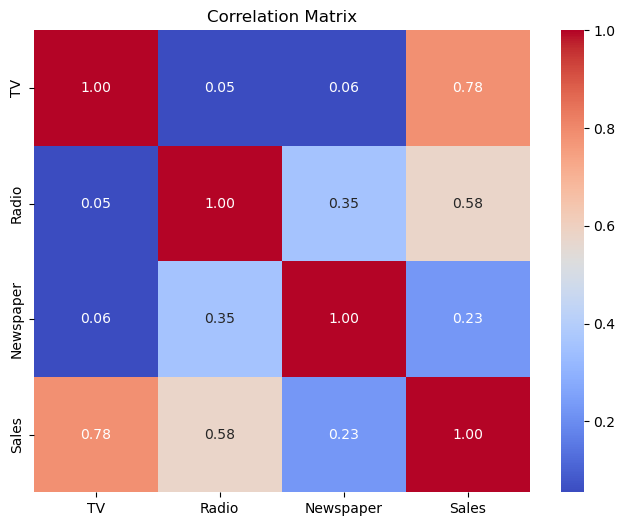

In [36]:
# Correlation matrix
correlation = data.corr()
print(correlation)

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [41]:
from sklearn.model_selection import train_test_split

X=data[['TV','Radio','Newspaper']]
y=data['Sales']

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

# <h3>Using Linear Regression</h3>

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [46]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred=model.predict(X_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [53]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Mean absolute error : {mae}")
print(f"Mean squared error : {mse}")
print(f"R squared error : {r2}")

Mean absolute error : 1.4607567168117606
Mean squared error : 3.1740973539761046
R squared error : 0.899438024100912


# <h3>Using Random Forest</h3>

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [61]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 0.6200999999999988
Mean Squared Error (MSE): 0.5907322499999988
R-squared: 0.9812843792541843


Cross-validated MSE: 0.6492077999999981


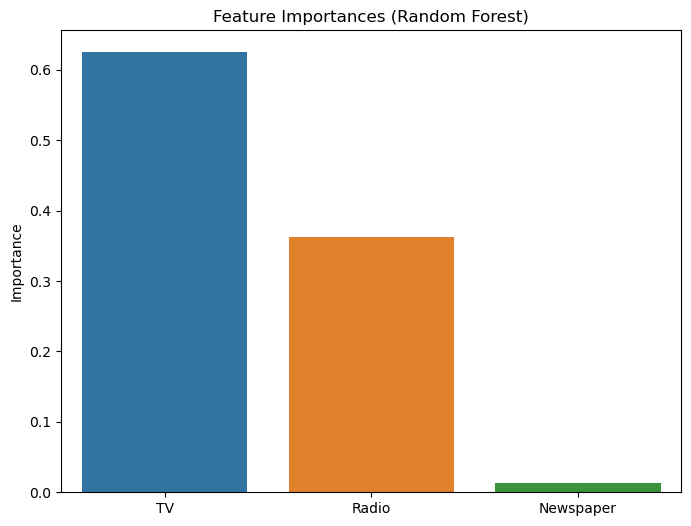

In [62]:
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-cv_scores.mean()}")

feature_importances = rf_model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=X.columns, y=feature_importances)
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.show()

In [63]:
new_data = np.array([[100, 25, 50]])
new_sales_prediction = rf_model.predict(new_data)
print(f"Predicted Sales for new data: {new_sales_prediction[0]}")

Predicted Sales for new data: 12.244999999999997


C:\Users\Hp\anaconda1\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# <h2>Inference</h2>
<p>The Random Forest model performs significantly better than the Linear Regression model in predicting sales. With an R² of 0.98, it explains 98% of the variance in sales, while the Linear Regression model only achieves an 0.90. The Random Forest model also shows lower error rates, with a Mean Absolute Error of 0.62 and a Mean Squared Error of 0.59, indicating more accurate predictions. Additionally, its cross-validation results (MSE: 0.65) demonstrate that it generalizes well to new data. Overall, the Random Forest model offers a more reliable and accurate approach to predicting sales based on advertising spend.</p>